In [90]:
import pandas as pd
import numpy as np
df= pd.read_csv("C://Users//Lekha//Downloads//bank-additional//bank-additional//bank-additional-full.csv", delimiter=";")

In [91]:
df.shape

(41188, 21)

In [92]:
#duplicated data
data_dup=df[df.duplicated(keep="last")]

In [93]:
df=df.drop_duplicates()
df.shape

(41176, 21)

In [94]:
df= df.drop(columns=['emp.var.rate','cons.price.idx','euribor3m','nr.employed','cons.conf.idx'],axis=1)

In [95]:
df.shape

(41176, 16)

Text(0.5,1.05,'Pearson correlation of Features')

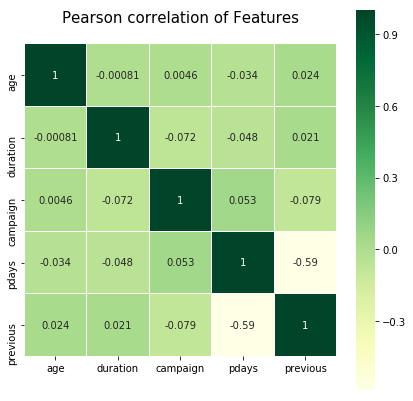

In [96]:
#correlation matrix of numerical features
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(7,7))

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

CHI-SQUARE TEST FOR CATEGORICAL VARIABLES

'job' - 'marital'
'job' - 'education'
'job' - 'housing'
'job' - 'loan'
'job' - 'contact'
'marital' - 'education'
'marital' - 'housing'
'marital' - 'loan'
'marital' - 'contact'
'education' - 'housing'
'education' - 'loan'
'education' - 'contact'
'housing' - 'loan'
'housing' - 'contact'
'loan' - 'contact'

In [97]:
df_cleaned=df.copy()

#Dropping the unknown job level
df_cleaned = df_cleaned[df_cleaned.job != 'unknown']
#Dropping the unknown marital status
df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']
#Dropping the unknown and illiterate education level
df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
df_cleaned = df_cleaned[df_cleaned.education != 'illiterate']
#Deleting the 'default' column
del df_cleaned['default']
#Deleting the 'duration' column
del df_cleaned['duration']
#Dropping the unknown housing loan status
df_cleaned = df_cleaned[df_cleaned.housing != 'unknown']
#Dropping the unknown personal loan status
df_cleaned = df_cleaned[df_cleaned.loan != 'unknown']

#Combining entrepreneurs and self-employed into self-employed
df_cleaned.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)

#Combining administrative and management jobs into admin_management
df_cleaned.job.replace(['admin.', 'management'], 'administration_management', inplace=True)

#Combining blue-collar and tecnician jobs into blue-collar
df_cleaned.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)

#Combining retired and unemployed into no_active_income
df_cleaned.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)

#Combining services and housemaid into services
df_cleaned.job.replace(['services', 'housemaid'], 'services', inplace=True)

#Combining single and divorced into single
df_cleaned.marital.replace(['single', 'divorced'], 'single', inplace=True)

#Combining basic school degrees
df_cleaned.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic_school', inplace=True)

In [98]:
df_cleaned.shape

(38216, 14)

In [99]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38216 entries, 0 to 41187
Data columns (total 14 columns):
age            38216 non-null int64
job            38216 non-null object
marital        38216 non-null object
education      38216 non-null object
housing        38216 non-null object
loan           38216 non-null object
contact        38216 non-null object
month          38216 non-null object
day_of_week    38216 non-null object
campaign       38216 non-null int64
pdays          38216 non-null int64
previous       38216 non-null int64
poutcome       38216 non-null object
y              38216 non-null object
dtypes: int64(4), object(10)
memory usage: 4.4+ MB


C:\Users\Lekha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


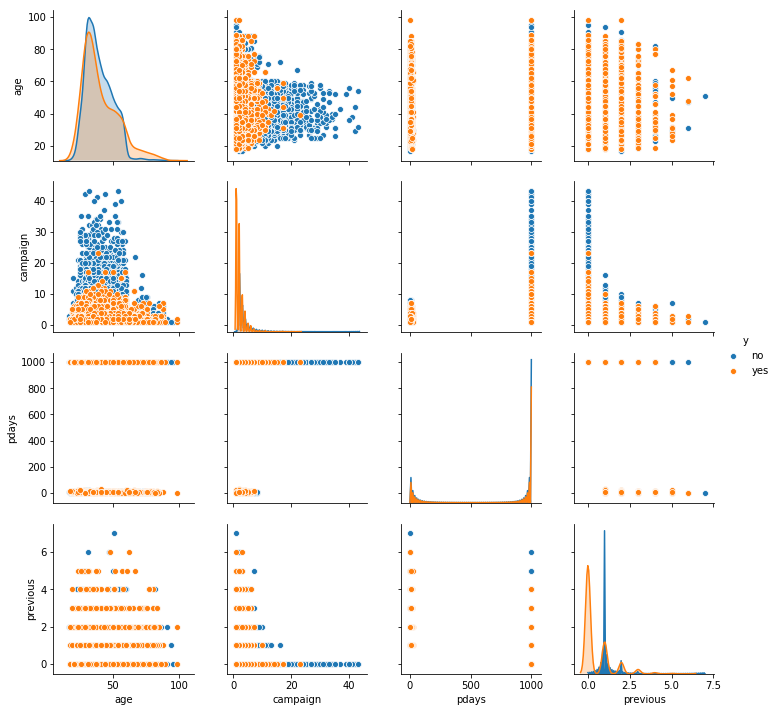

In [37]:
import seaborn as sns
sns.pairplot(df_cleaned,hue = 'y')

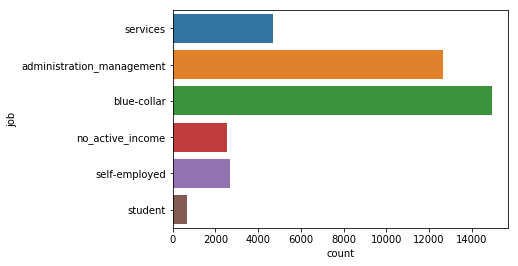

<Figure size 360x360 with 0 Axes>

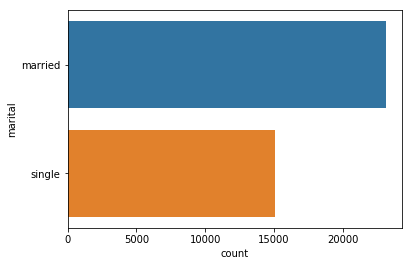

<Figure size 360x360 with 0 Axes>

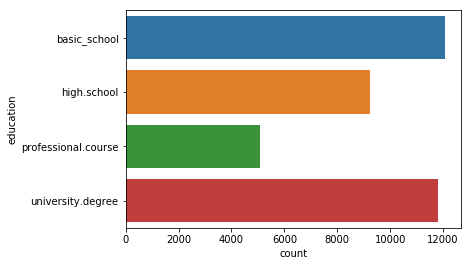

<Figure size 360x360 with 0 Axes>

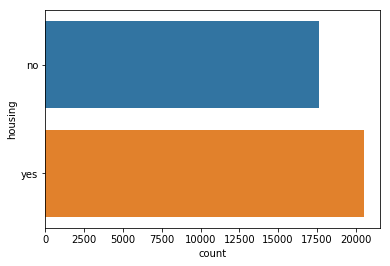

<Figure size 360x360 with 0 Axes>

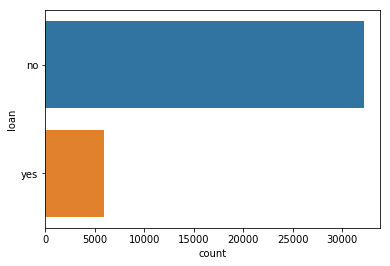

<Figure size 360x360 with 0 Axes>

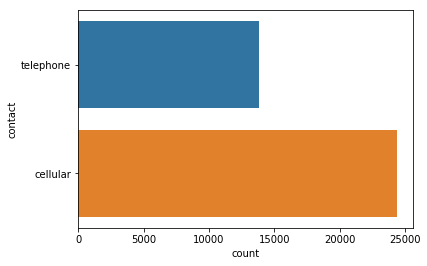

<Figure size 360x360 with 0 Axes>

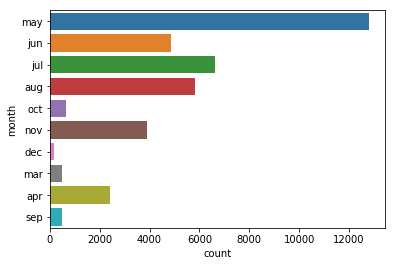

<Figure size 360x360 with 0 Axes>

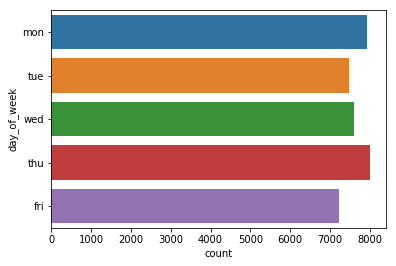

<Figure size 360x360 with 0 Axes>

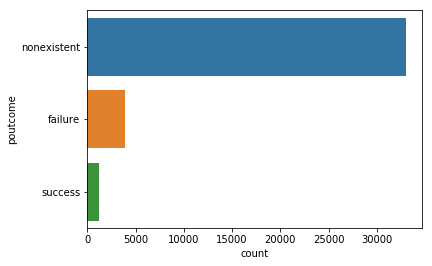

<Figure size 360x360 with 0 Axes>

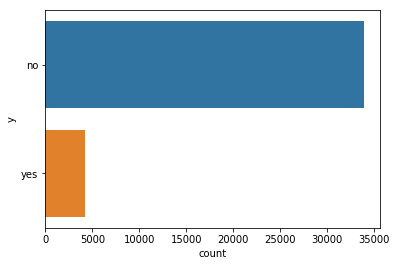

<Figure size 360x360 with 0 Axes>

In [70]:
import seaborn as sns
for feature in df_cleaned.dtypes[df_cleaned.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df_cleaned)
    plt.figure(figsize=(5, 5))
    plt.show()

C:\Users\Lekha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


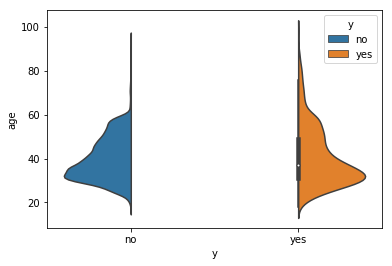

In [114]:
sns.violinplot(x ='y', y ='age', data = df_cleaned, hue ='y', split = True) 

In [100]:
categorical_feature_mask = df_cleaned.dtypes==object

# filter categorical columns using mask and turn it into a list
categorcial_variables = df_cleaned.columns[categorical_feature_mask].tolist()

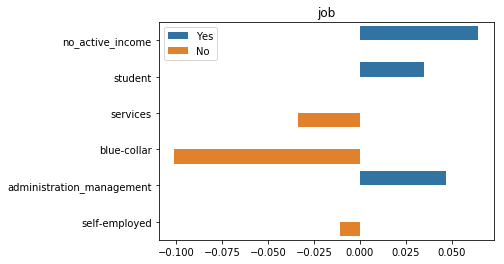

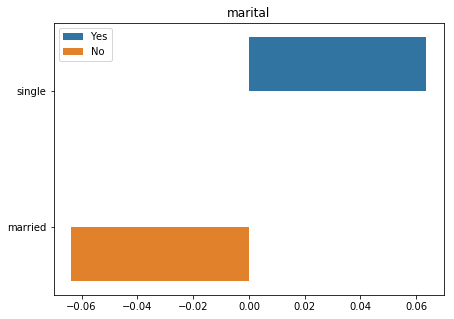

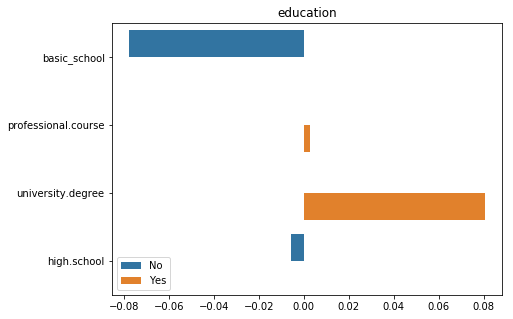

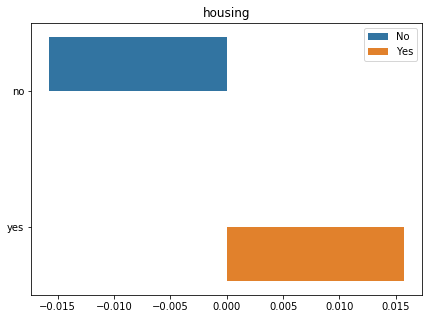

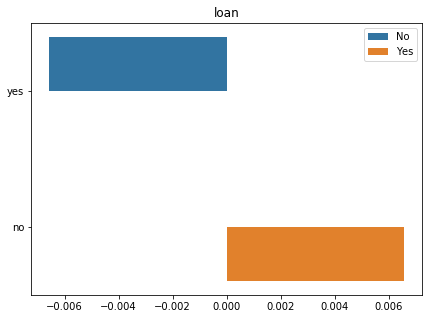

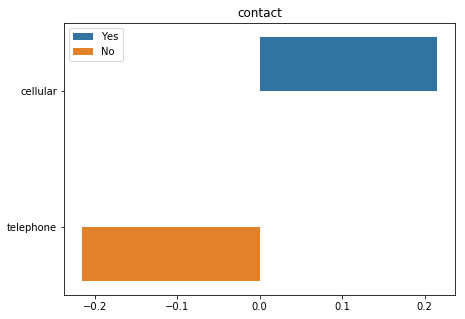

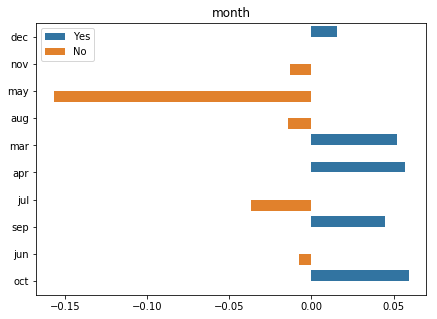

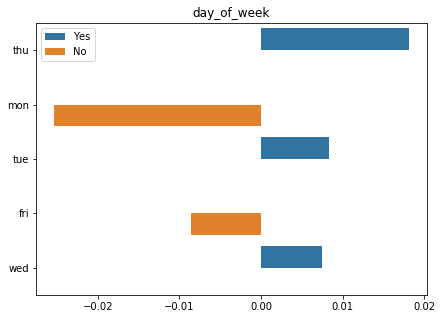

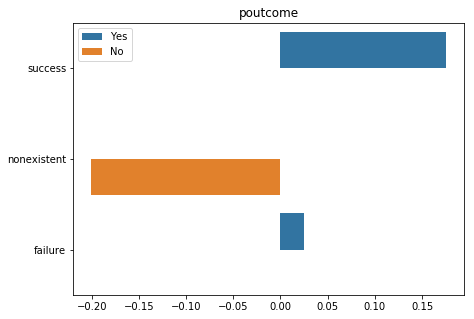

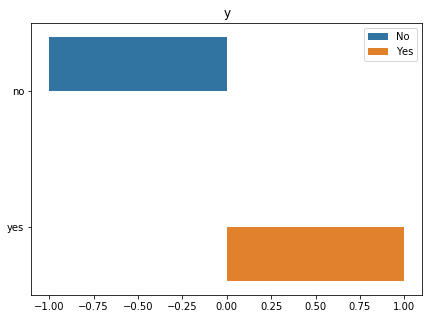

<Figure size 504x360 with 0 Axes>

In [101]:
for col in categorcial_variables:
   
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df_cleaned.loc[df_cleaned.y.values == 'yes', col].value_counts() 
    neg_counts = df_cleaned.loc[df_cleaned.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df_cleaned.y.values == 'yes').sum()
    freq_neg = (df_cleaned.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    colors = ['Yes' if c >= 0 else 'No' for c in all_counts]
    sns.barplot(all_counts, all_index,hue=colors, palette=sns.color_palette())
    plt.title(col)
    plt.figure(figsize=(7, 5))
    plt.tight_layout()

In [20]:
#Creating the contingency table for comparing 'job' and 'education'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['education'], margins=True)
contingency_table

education,basic_school,high.school,professional.course,university.degree,All
job,,,,,
administration_management,1056,3536,440,7629,12661
blue-collar,7678,1711,3681,1857,14927
no_active_income,1116,517,373,530,2536
self-employed,732,344,289,1339,2704
services,1347,2784,272,297,4700
student,132,349,42,165,688
All,12061,9241,5097,11817,38216


In [21]:
#Calculating chi-squared and p-value
from scipy import stats
chi2, p, dof, ex=stats.chi2_contingency(contingency_table)
chi2, p, dof

(17133.459428216494, 0.0, 24)

In [22]:
#Creating the contingency table for comparing 'job' and 'marital'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['marital'], margins=True)
contingency_table

marital,married,single,All
job,,,
administration_management,6937,5724,12661
blue-collar,9694,5233,14927
no_active_income,1758,778,2536
self-employed,1856,848,2704
services,2878,1822,4700
student,39,649,688
All,23162,15054,38216


In [23]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(1321.2378780514482, 1.3204090375128439e-275, 12)

In [24]:
#Creating the contingency table for comparing 'job' and 'housing'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['housing'], margins=True)
contingency_table

housing,no,yes,All
job,,,
administration_management,5806,6855,12661
blue-collar,6931,7996,14927
no_active_income,1146,1390,2536
self-employed,1232,1472,2704
services,2220,2480,4700
student,318,370,688
All,17653,20563,38216


In [25]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(4.429246792052626, 0.9743878824455812, 12)

In [26]:
#Creating the contingency table for comparing 'job' and 'loan'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['loan'], margins=True)
contingency_table

loan,no,yes,All
job,,,
administration_management,10563,2098,12661
blue-collar,12665,2262,14927
no_active_income,2169,367,2536
self-employed,2316,388,2704
services,3974,726,4700
student,573,115,688
All,32260,5956,38216


In [27]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(17.723027580354454, 0.12436280798972299, 12)

In [28]:
#Creating the contingency table for comparing 'job' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
job,,,
administration_management,8612,4049,12661
blue-collar,9152,5775,14927
no_active_income,1714,822,2536
self-employed,1644,1060,2704
services,2777,1923,4700
student,518,170,688
All,24417,13799,38216


In [29]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(248.6344376402693, 2.6355502452105424e-46, 12)

In [30]:
#Creating the contingency table for comparing'marital' and 'education'
contingency_table = pd.crosstab(index=df_cleaned['marital'], columns=df_cleaned['education'], margins=True)
contingency_table

education,basic_school,high.school,professional.course,university.degree,All
marital,,,,,
married,8844,5017,3079,6222,23162
single,3217,4224,2018,5595,15054
All,12061,9241,5097,11817,38216


In [31]:
#Filtering out zero values
contingency_table = contingency_table.loc[['married', 'single', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(1285.057637623233, 3.9887372282493244e-272, 8)

In [32]:
#Creating the contingency table for comparing'marital' and 'housing'
contingency_table = pd.crosstab(index=df_cleaned['marital'], columns=df_cleaned['housing'], margins=True)
contingency_table

housing,no,yes,All
marital,,,
married,10807,12355,23162
single,6846,8208,15054
All,17653,20563,38216


In [33]:
#Filtering out zero values
contingency_table = contingency_table.loc[['married', 'single', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(5.1289486415790755, 0.27432061377318107, 4)

In [34]:
#Creating the contingency table for comparing'marital' and 'loan'
contingency_table = pd.crosstab(index=df_cleaned['marital'], columns=df_cleaned['loan'], margins=True)
contingency_table

loan,no,yes,All
marital,,,
married,19558,3604,23162
single,12702,2352,15054
All,32260,5956,38216


In [35]:
#Filtering out zero values
contingency_table = contingency_table.loc[['married', 'single', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(0.028216231941144435, 0.999901411619859, 4)

In [36]:
#Creating the contingency table for comparing'marital' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['marital'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
marital,,,
married,14214,8948,23162
single,10203,4851,15054
All,24417,13799,38216


In [37]:
#Filtering out zero values
contingency_table = contingency_table.loc[['married', 'single', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(162.40971901876216, 4.447081644652784e-34, 4)

In [38]:
#Creating the contingency table for comparing 'education' and 'housing'
contingency_table = pd.crosstab(index=df_cleaned['education'], columns=df_cleaned['housing'], margins=True)
contingency_table

housing,no,yes,All
education,,,
basic_school,5696,6365,12061
high.school,4338,4903,9241
professional.course,2269,2828,5097
university.degree,5350,6467,11817
All,17653,20563,38216


In [39]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(17.057331308332717, 0.029517599323114704, 8)

In [40]:
#Creating the contingency table for comparing 'education' and 'loan'
contingency_table = pd.crosstab(index=df_cleaned['education'], columns=df_cleaned['loan'], margins=True)
contingency_table

loan,no,yes,All
education,,,
basic_school,10246,1815,12061
high.school,7808,1433,9241
professional.course,4307,790,5097
university.degree,9899,1918,11817
All,32260,5956,38216


In [41]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(6.456578102058864, 0.5962279381621809, 8)

In [42]:
#Creating the contingency table for comparing 'education' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['education'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
education,,,
basic_school,6839,5222,12061
high.school,5776,3465,9241
professional.course,3387,1710,5097
university.degree,8415,3402,11817
All,24417,13799,38216


In [43]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(566.7247955787018, 3.3170778445205554e-117, 8)

In [44]:
#Creating the contingency table for comparing 'housing' and 'loan'
contingency_table = pd.crosstab(index=df_cleaned['housing'], columns=df_cleaned['loan'], margins=True)
contingency_table

loan,no,yes,All
housing,,,
no,15213,2440,17653
yes,17047,3516,20563
All,32260,5956,38216


In [45]:
#Filtering out zero values
contingency_table = contingency_table.loc[['no', 'yes', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(77.51641833947268, 5.847233584984991e-16, 4)

In [46]:
#Creating the contingency table for comparing 'housing' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['housing'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
housing,,,
no,10532,7121,17653
yes,13885,6678,20563
All,24417,13799,38216


In [47]:
#Filtering out zero values
contingency_table = contingency_table.loc[['no', 'yes', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(254.5546033846517, 6.797043032460774e-54, 4)

In [48]:
#Creating the contingency table for comparing 'loan' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['loan'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
loan,,,
no,20542,11718,32260
yes,3875,2081,5956
All,24417,13799,38216


In [49]:
#Filtering out zero values
contingency_table = contingency_table.loc[['no', 'yes', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(4.1748089246381035, 0.3828646661927529, 4)

In [102]:
X = df_cleaned.iloc[:,:-1]
y = df_cleaned['y']
print(X.shape)
print(y.shape)

(38216, 13)
(38216,)


In [103]:
categorical_feature_mask = X.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [105]:
#one-hot encoding
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
 
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test):
    for i in categorical_cols:
        Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
        print("Encoding for feature: ", i)
        # Encoding training dataset 
        temp_cols = Vectorizer.fit_transform(X_train[i])
        X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

        # Encoding Test dataset
        temp_cols = Vectorizer.transform(X_test[i])
        X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [106]:
OneHotEncoder(categorical_cols, X_train, X_test)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job


C:\Users\Lekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (26751, 44)
Shape of test:  (11465, 44)


In [107]:
# Replace "no" with 0 and "yes" with 1

y_train.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [108]:
y_train.value_counts()

0    23765
1     2986
Name: y, dtype: int64

In [109]:
from imblearn.combine import SMOTETomek

In [110]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X_train,y_train)

In [111]:
X_res.shape,y_res.shape

((46624, 44), (46624,))

In [112]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 23765, 1: 2986})
Resampled dataset shape Counter({0: 23312, 1: 23312})


In [60]:
#Machine Learning Algorithms

In [159]:
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()
dual=[True,False]
max_iter=[500,1000,2000,4000]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))


Best: 0.896490 using {'max_iter': 1000, 'dual': False, 'C': 1.5}


In [160]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
logmodel = LogisticRegression(max_iter=1000,dual=False,C=1.5) 
logmodel.fit(X_res,y_res)
logpred = logmodel.predict(X_test)


cf_matrix=(confusion_matrix(y_test, logpred))
print(cf_matrix)
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_res, y_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

C:\Users\Lekha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[10046   152]
 [  985   282]]
90.0


C:\Users\Lekha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Lekha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [142]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10198
           1       0.51      0.26      0.35      1267

    accuracy                           0.89     11465
   macro avg       0.71      0.62      0.64     11465
weighted avg       0.87      0.89      0.88     11465



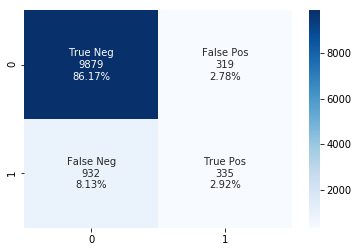

In [143]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [83]:
#SVC Algorithm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_res, y_res)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_res, y_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10017   158]
 [ 1045   245]]
90.0


In [75]:
print(classification_report(y_test,svcpred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10175
           1       0.61      0.19      0.29      1290

    accuracy                           0.90     11465
   macro avg       0.76      0.59      0.62     11465
weighted avg       0.87      0.90      0.87     11465



In [133]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_res, y_res)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_res, y_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[9295  903]
 [ 882  385]]
84.0


In [134]:
print(classification_report(y_test,dtreepred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10198
           1       0.30      0.30      0.30      1267

    accuracy                           0.84     11465
   macro avg       0.61      0.61      0.61     11465
weighted avg       0.85      0.84      0.84     11465



In [162]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,13),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X_train,y_train):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=3)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X_train,y_train)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_train, y_train)

In [163]:
rf_parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 9,
 'min_samples_leaf': 2,
 'n_estimators': 400}

In [164]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 400,min_samples_leaf=2,max_features=9,max_depth=3,criterion='gini',bootstrap=True)
rfc.fit(X_res, y_res)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_res, y_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8414 1784]
 [ 579  688]]
79.0


In [85]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_res, y_res)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_res, y_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[9681  548]
 [ 845  391]]
88.0


In [136]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfcpred))


              precision    recall  f1-score   support

           0       0.94      0.82      0.87     10198
           1       0.27      0.55      0.36      1267

    accuracy                           0.79     11465
   macro avg       0.60      0.68      0.62     11465
weighted avg       0.86      0.79      0.82     11465



In [145]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_res, y_res)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_res, y_res, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[9180 1018]
 [ 696  571]]
85.0


In [146]:
print(classification_report(y_test,probs))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     10198
           1       0.36      0.45      0.40      1267

    accuracy                           0.85     11465
   macro avg       0.64      0.68      0.66     11465
weighted avg       0.87      0.85      0.86     11465



In [147]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_res, y_res)
xgbprd = xgb.predict(X_test)

cf_matrix=(confusion_matrix(y_test, xgbprd ))
print(cf_matrix)
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_res, y = y_res, cv = 10).mean())

[[9935  263]
 [ 944  323]]
89.0


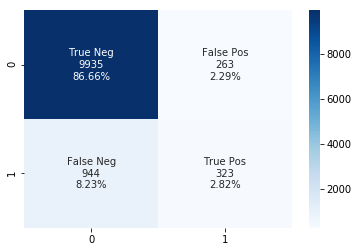

In [148]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [149]:
print(classification_report(y_test,xgbprd))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10198
           1       0.55      0.25      0.35      1267

    accuracy                           0.89     11465
   macro avg       0.73      0.61      0.65     11465
weighted avg       0.87      0.89      0.88     11465



In [150]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_res, y_res)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_res, y_res, cv=k_fold, n_jobs=1).mean())

[[9608  590]
 [ 740  527]]
88.0


In [151]:
print(classification_report(y_test,gbkpred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     10198
           1       0.47      0.42      0.44      1267

    accuracy                           0.88     11465
   macro avg       0.70      0.68      0.69     11465
weighted avg       0.88      0.88      0.88     11465



In [161]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier',
                            'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
2,Logistic Model,0.934776
4,XGBoost,0.931415
1,Decision Tree Classifier,0.918111
5,Gradient Boosting,0.905328
0,Random Forest Classifier,0.782795
3,Gausian NB,0.703779


In [165]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier',
                            'Logistic Model'],
                'Score':  [RFCCV, LOGCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
1,Logistic Model,0.934776
0,Random Forest Classifier,0.784554


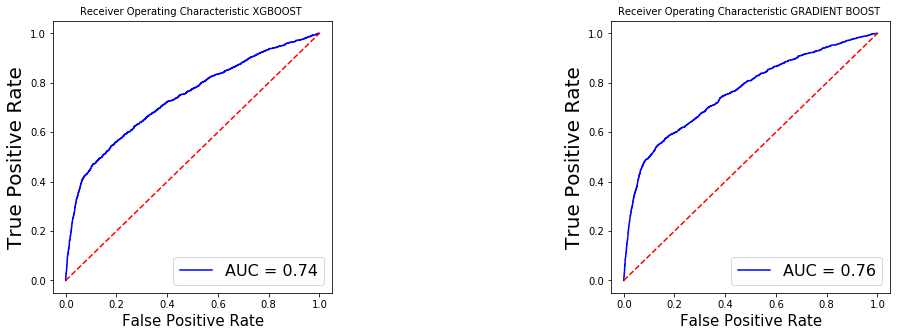

In [77]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

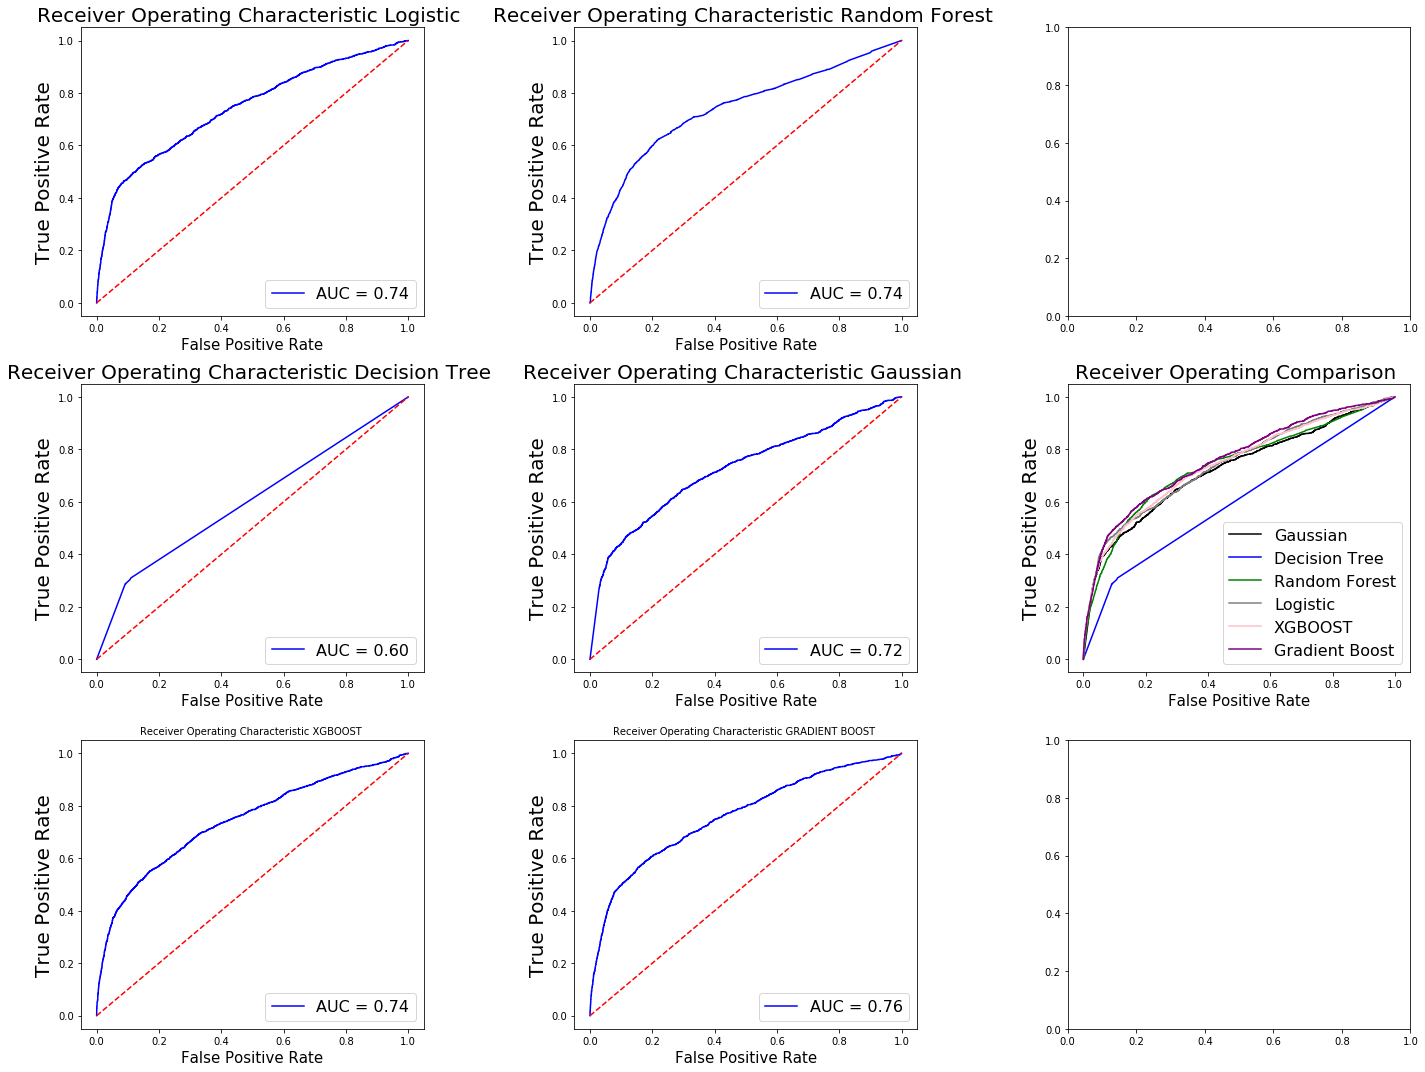

In [98]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
from sklearn import metrics
fig, ax_arr = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[2,0].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[2,0].plot([0, 1], [0, 1],'r--')
ax_arr[2,0].set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,0].legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax_arr[2,1].plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax_arr[2,1].plot([0, 1], [0, 1],'r--')
ax_arr[2,1].set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,1].legend(loc = 'lower right', prop={'size': 16})



#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].plot(fprxgb, tprxgb, 'b', label = 'XGBOOST', color='pink')
ax_arr[1,2].plot(fprgbk, tprgbk, 'b', label = 'Gradient Boost', color='purple')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [95]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [85]:
feature_importances

,importance
age,0.123015
contact_telephone,0.061940
month_may,0.059626
campaign,0.051135
month_aug,0.046734
month_jul,0.044725
month_nov,0.039407
pdays,0.029000
day_of_week_thu,0.027034
housing_yes,0.026147
